# Previsão de preços de Laptops

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#Carrega o Dataframe

df = pd.read_csv('datasets/laptops.csv')
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


### Limpeza e Preparação dos Dados

In [3]:
# Renomear colunas
df = df.rename(columns={'Brand' : 'Marca', 
                        'Model' : 'Modelo',
                        'Screen' : 'Tela',
                        'Final Price':'Valor'})


# Laptops sem GPU = Integrada.
df['GPU'].fillna('Integrada', inplace=True)

# Remove os nulos 
df.dropna(inplace=True)

In [4]:
# Codificação das colunas de texto com valores numéricos
label_encoder = LabelEncoder()
df['Status_encoded'] = label_encoder.fit_transform(df['Status'])
df['Storage_encoded'] = label_encoder.fit_transform(df['Storage type'])
df['Touch_encoded'] = label_encoder.fit_transform(df['Touch'])
df['GPU_encoded'] = label_encoder.fit_transform(df['GPU'])
df['CPU_encoded'] = label_encoder.fit_transform(df['CPU'])

### Modelo e treinamento

In [5]:
# Preparação dos dados
# Características
X = df[['CPU_encoded','GPU_encoded','RAM', 'Storage', 'Tela', 'Status_encoded', 'Storage_encoded', 'Touch_encoded']]

# Objetivo
y = df['Valor']  

# Split dos dados para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria o modelo de regressão linear e alinha com os dados de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Faz a previsão dos valores para os dados de teste
y_pred = model.predict(X_test)

In [6]:
# Quantidade de itens para treinar e testar
X_train.shape, X_test.shape

((1691, 8), (423, 8))

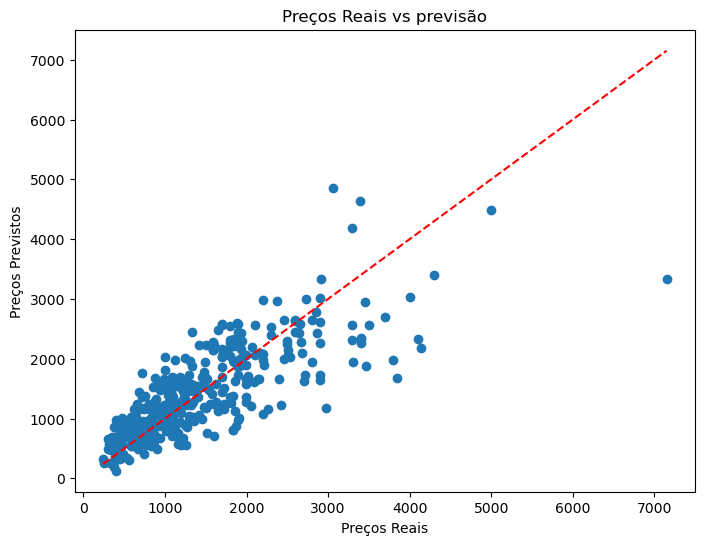

In [12]:
# Visualização do Modelo
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Preços Reais')
plt.ylabel('Preços Previstos')
plt.title('Preços Reais vs previsão')
plt.show()

In [8]:
# Avaliação do modelo:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Erro Quadrático Médio (MSE):', mse)
print('Raiz do Erro Quadrático Médio (RMSE):', rmse)
print('Erro Médio Absoluto (MAE):', mae)
print('R-quadrado (R2 Score):', r2)

Erro Quadrático Médio (MSE): 276935.7704586761
Raiz do Erro Quadrático Médio (RMSE): 526.2468721604681
Erro Médio Absoluto (MAE): 367.45826296305535
R-quadrado (R2 Score): 0.6434421401456014


# Faz previsão dos preços de novos Laptops

Parâmetros


In [9]:
cpu = 16           # Olhar abaixo
gpu = 5            # Olhar abaixo
ram = 32           # 4, 8, 16, 32, etc
storage = 1024     # Tamanho do storage
tela = 15          # Tamanho da tela
status = 0         # 0: New, 1: Refurbished
tipo_storage = 0   # 0: SSD,  1: eMMC
touch = 1          # 0: No, 1: Yes


df_novo = pd.DataFrame([{
    'CPU_encoded': cpu,
    'GPU_encoded': gpu,
    'RAM': ram,
    'Storage': storage,
    'Tela': tela,
    'Status_encoded': status,
    'Storage_encoded': tipo_storage,
    'Touch_encoded': touch
}])



# Fazer a previsão usando o modelo treinado
previsao = model.predict(df_novo)
print("Previsão de Valor para o Novo Laptop:", previsao[0])

Previsão de Valor para o Novo Laptop: 2459.14414187127








#### Para encontrar mais facilmente os parametros encoded para informar:

In [10]:
def help_encoded(column_name, df):
    label_encoder = LabelEncoder()
    df[column_name + '_encoded'] = label_encoder.fit_transform(df[column_name])
    column_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f'{column_name}:')
    for key, value in column_mapping.items():
        print(f"{value}: {key}")
    
    print('\n\n')

In [11]:
help_encoded('CPU', df)
help_encoded('GPU', df)
help_encoded('Status', df)
help_encoded('Storage type', df)
help_encoded('Touch', df)



CPU:
0: AMD 3015Ce
1: AMD 3015e
2: AMD 3020e
3: AMD Athlon
4: AMD Radeon 9
5: AMD Ryzen 3
6: AMD Ryzen 5
7: AMD Ryzen 7
8: AMD Ryzen 9
9: Apple M1
10: Apple M1 Pro
11: Apple M2
12: Apple M2 Pro
13: Intel Celeron
14: Intel Core M3
15: Intel Core i3
16: Intel Core i5
17: Intel Core i7
18: Intel Core i9
19: Intel Evo Core i5
20: Intel Evo Core i7
21: Intel Evo Core i9
22: Intel Pentium
23: Mediatek MT8183
24: Microsoft SQ1
25: Qualcomm Snapdragon 7
26: Qualcomm Snapdragon 8



GPU:
0: 610 M
1: A 370M
2: A 730M
3: GTX 1050
4: GTX 1070
5: GTX 1650
6: GTX 1660
7: Integrada
8: MX 130
9: MX 330
10: MX 450
11: MX 550
12: P 500
13: RTX 2050
14: RTX 2060
15: RTX 2070
16: RTX 2080
17: RTX 3000
18: RTX 3050
19: RTX 3060
20: RTX 3070
21: RTX 3080
22: RTX 4050
23: RTX 4060
24: RTX 4070
25: RTX 4080
26: RTX 4090
27: RTX A1000
28: RTX A2000
29: RTX A3000
30: RTX A5500
31: RX 6500M
32: RX 6700M
33: RX 6800S
34: RX 7600S
35: Radeon Pro 5300M
36: Radeon Pro 5500M
37: Radeon Pro RX 560X
38: Radeon RX 6600M